<a href="https://colab.research.google.com/github/saikiranchetti18/Gender_Prediction/blob/main/ML_MAJOR_JUNE_ML063B14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

from collections import Counter
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_csv('/content/Information.csv', encoding ='latin-1')

In [6]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [7]:
df.shape

(20050, 26)

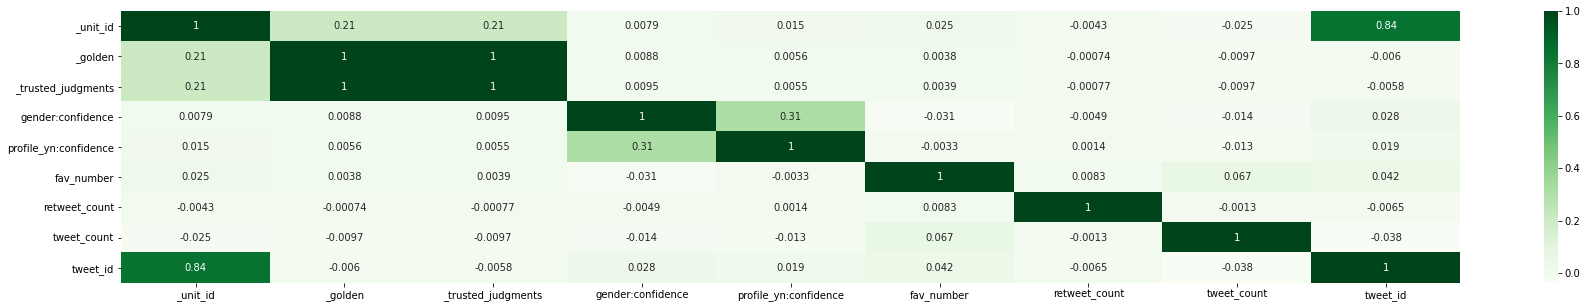

In [8]:
import matplotlib.pyplot as rcParams
import seaborn as sns
corre=df.corr()
corr_features=corre.index
plt.figure(figsize=(30,5))
g=sns.heatmap(df[corr_features].corr(),annot=True,cmap="Greens")

In [9]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [10]:
#Removing all rows which don't have gender as 'male' or 'female' 

df= df.loc[df['gender'].isin(['female', 'male'])]
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [11]:
df.shape

(12894, 26)

In [12]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [13]:
#Dropping unwanted columns from dataset

df = df.drop([ '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord',  'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [14]:
df.head()

,_unit_id,gender,description,link_color,sidebar_color,text,tweet_count
0,815719226,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,815719228,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,5617
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,31462


# Data Exploration & Feature Engineering

# Questions to be answered at the end of EDA:# 

In [15]:
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split

In [16]:
#Function to normalize text

def normalize_text_feature(txt):
    '''
    To normalize the text we convert them to strings, in lowercase and remove all punctuations.
    
    Arguments:
    txt: the text in the dataset that needs to be normalized.
    
    Returns:
    s: normalized string
    '''
    s = str(txt) 
    s = s.lower()
    s = re.sub('\W\s',' ',s)
    s = re.sub('\s\W',' ',s)
    s = re.sub('@',' at_the_rate ',s)
    s = re.sub('\s+',' ',s)
    return s

In [17]:
#Function to find the different words and the number of occurences of each word

def compute_bag_of_words(txt):
    '''    
    Arguments:
    txt: The text in the dataset that needs to be vectorised.
    
    Returns:
    vectors: number of occurences of different words in txt 
    vocabulary: different words in txt
    '''
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(txt)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

In [18]:
#Function to visualize the most used words in a dataset

def print_most_frequent(bow, vocab, gender):
    '''
    The 30 most used words are selected and displayed in a graph.
    
    Arguments:
    bow: bag of words - number of occurences of different words in the text
    vocab: different words in the text
    gender: the gender for which the graph is to be displayed
    
    Returns:
    None
    '''
    color_idx = ['female', 'male']
    label_table = ["Most used words by females for 'all_text'", "Most used words by males for 'all_text'"]
    
    #Selecting the 30 most used words to display
    n_most = 30
    idx = np.argsort(bow.sum(axis=0))
    idx_most_used = np.zeros(n_most)
    occurence_number = np.zeros(n_most)
    words_most_used = ["" for x in range(n_most)]

    for i in range(0,n_most):
        idx_most_used[i] = idx[0, -1-i]
        words_most_used[i] = vocab[np.int64(idx_most_used[i])]
        occurence_number[i] = bow.sum(axis=0)[0, idx[0, -1-i]]

    #Plotting the graph
    fig, ax = plt.subplots()
    
    word_number = np.arange(n_most)+1
    rects1 = plt.barh(word_number, occurence_number, label = label_table[color_idx.index(gender)])
    plt.yticks(word_number,words_most_used)
    plt.ylabel('Most used words')
    plt.xlabel('Number of occurences')
    plt.title(label_table[color_idx.index(gender)])
    plt.tight_layout()
    plt.show()

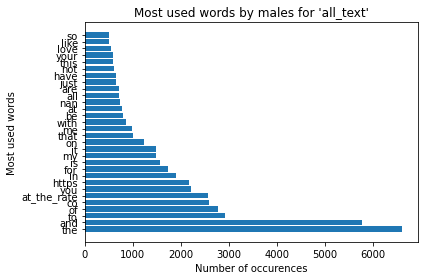

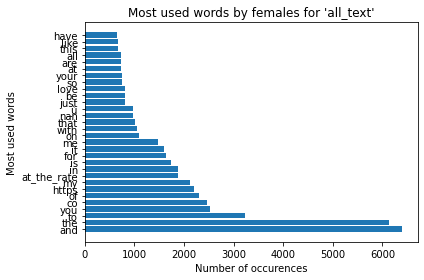

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky catching up with th...


In [19]:
#Data exploration for text features
#Normalizing text and finding the most used words by each gender

#Adding a new column to the dataframe to store normalised version of 'text' and 'description'
df['text_norm'] = [normalize_text_feature(txt) for txt in df['text']]
df['description_norm'] = [normalize_text_feature(txt) for txt in df['description']]

#Concatenating the nomalized 'text_norm' and 'description_norm' into a single column as text can be represented in a single column
df['all_text'] =df['text_norm'].str.cat(df['description_norm'],sep=' ')
df = df.drop(['text', 'description', 'text_norm', 'description_norm'], axis = 1)

#Extract separate gender dataframes
female_data = df[df['gender']=='female']
male_data = df[df['gender']=='male']

#Computing and displaying bag of words and occurences of words for each gender
male_bow, male_voc = compute_bag_of_words(male_data['all_text'])
print_most_frequent(male_bow, male_voc, 'male')

female_bow, female_voc = compute_bag_of_words(female_data['all_text'])
print_most_frequent(female_bow, female_voc, 'female')

df.head()

In [20]:
#This function is to visualize the most used colors by each gender in their profile

def explore_color_feature(df, feature):
    '''
    Definition of function for data exploration for the colors.
    The explore_color_feature function plots the most used colors by gender as bar graphs.
    
    Arguments:
    feature : 'sidebar_color', 'link_color'
    df: dataset to be visualized.
    
    Returns:
    None
    '''

    #Creating a subset of the gender and color of the feature being visualized
    Color_subset = df.loc[:,['gender', feature]]

    #Splitting the dataset w.r.t. 'gender' 
    Color_subset_male = Color_subset[Color_subset['gender'] == 'male']
    Color_subset_female = Color_subset[Color_subset['gender'] == 'female']

    #List of all colors and number of users for each gender
    colors_list_male = list(Color_subset_male[feature].values.flatten())
    colors_list_female = list(Color_subset_female[feature].values.flatten())

    #30 Most common colors used by each gender (30 chosen for easy clarity in representation)
    nCommon = 30
    top_colors_female = [x[0] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_male = [x[0] for x in Counter(colors_list_male).most_common(nCommon)]

    #Number of profiles using the each color in the 30 most common colors
    top_colors_users_female = [x[1] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_users_male = [x[1] for x in Counter(colors_list_male).most_common(nCommon)]

    #Deriving the hexadecimal value to represent each color in the graph
    top_colors_female_hex = ['#' + x + '000000' for x in top_colors_female]
    top_colors_female_hex = [x[0:7] for x in top_colors_female_hex]
    top_colors_male_hex = ['#' + x + '000000' for x in top_colors_male]
    top_colors_male_hex = [x[0:7] for x in top_colors_male_hex]

    #Range of colors for each gender
    color_range_female = list(range(len(top_colors_female)))
    color_range_male = list(range(len(top_colors_male)))

    #Color usage plot for female profiles
    fig1, ax1 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_female, top_colors_users_female, bar_width, label = 'Female', color = top_colors_female_hex)
    plt.yticks(color_range_female, top_colors_female_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Females for ' + feature)
    plt.tight_layout()
    plt.show()

    #Color usage plot for male profiles
    fig2, ax2 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_male, top_colors_users_male, bar_width, label = 'Male', color = top_colors_male_hex)
    plt.yticks(color_range_male, top_colors_male_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Males for ' + feature)
    plt.tight_layout()
    plt.show()

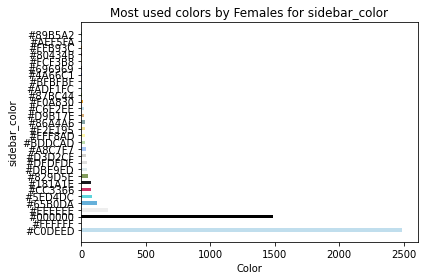

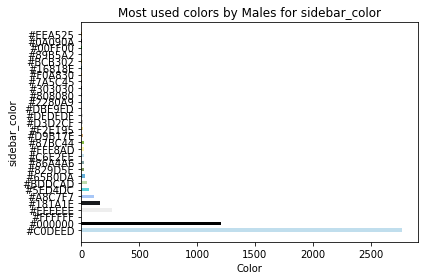

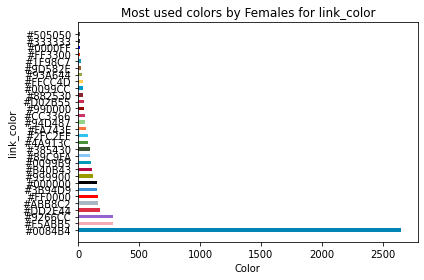

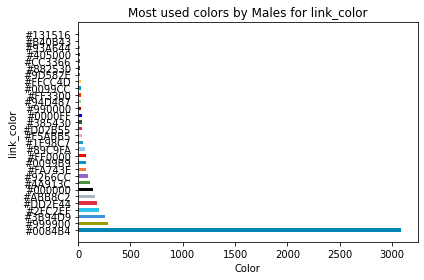

In [21]:
#Data exploration for color features

#Removing weird values from color
df = df.loc[(df['sidebar_color']).str.contains('E\+') != True]
df = df.loc[(df['link_color']).str.contains('E\+') != True]

#Plot for the most used 'sidebar_colors'
explore_color_feature(df, 'sidebar_color')

#Plot for the most used 'link_colors'
explore_color_feature(df, 'link_color')

In [22]:
df.dropna()

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky catching up with th...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,at_the_rate lookupondeath ..fine and i'll dri...
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


In [23]:
df.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text'],
      dtype='object')

In [24]:
df.apply(pd.to_numeric, downcast="integer", errors="ignore")

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky catching up with th...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,at_the_rate lookupondeath ..fine and i'll dri...
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


In [27]:
def find_typos(text):
    text=re.sub("<[^>]*>"," ",text) #remove html
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text) #remove url
    text=re.sub("@[A-Za-z0-9_]+"," ",text)#remove tags          #To avoid counting tags and hashtags as a typo
    text=re.sub("#[A-Za-z0-9_]+"," ",text) #remove hashtags
    text=re.sub("_+"," ",text)#remove underscore 
    text=re.sub("[^a-zA-z]"," ",text) #remove symbols and digits
    text=text.lower() #converting to lowercase
    word_list=text.split() #splitting the text
    typolist=[typo for typo in spell.unknown(word_list) if not typo ==set()]  #list of typos
    return len(typolist) #returns no. of typos in "text" 

In [28]:
df_male=df[df['gender']=='male']
df_female=df[df['gender']=='female']

In [29]:
df_female.head(3)

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
4,815719230,female,3B94D9,0,31462,watching neighbours on sky catching up with th...
5,815719231,female,F5ABB5,0,20036,ive seen people on the train with lamps chairs...
8,815719234,female,9266CC,0,482,at_the_rate _aphmau_ the pic defines all mcd ...


In [30]:
df_male.head(5)

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
7,815719233,male,0000FF,C0DEED,112117,gala bingo clubs bought for å£241m the uk's la...


# Logistic Regression

In [31]:
le = LabelEncoder()

In [32]:
df['Gender2'] = le.fit_transform(df['gender'].astype('str'))
df['Linkcolor'] = le.fit_transform(df['link_color'].astype('str'))
df['Text1'] = le.fit_transform(df['all_text'].astype('str'))
df['Sidebar1'] = le.fit_transform(df['sidebar_color'].astype('str'))

In [36]:
df.columns
l=df['Text1']
print(len(df))
print(max(l))
#print(l[1])

12859
12720


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LogReg = LogisticRegression()

In [39]:
X = df[['tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [40]:
Y = df[['Gender2']].values

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [42]:
LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
LogReg.score(X_test, Y_test)

0.5670295489891135

# knn algorithm


In [44]:
df.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text', 'Gender2', 'Linkcolor', 'Text1', 'Sidebar1'],
      dtype='object')

In [45]:
C = df[['tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [46]:
D = Y = df[['Gender2']].values

In [47]:
C_train, C_test, D_train, D_test = train_test_split(C,D)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(C_train, D_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
d_pred = knn.predict(C_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(D_test,d_pred)

0.5548989113530327

In [54]:
#create a dictionary of all values we want to test for n_neighbors
params_knn={'n_neighbors':np.arange(1,25)}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
#use gridsearch to test all values for n_neighbors
knn_gs=GridSearchCV(knn, params_knn, cv=5)

In [57]:
#fit model to training data
knn_gs.fit(C_train,D_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
#save best model
knn_best=knn_gs.best_estimator_

In [59]:
print(knn_gs.best_params_)

{'n_neighbors': 15}


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
df.head()

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text,Gender2,Linkcolor,Text1,Sidebar1
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...,1,165,10052,407
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...,1,51,12697,261
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...,1,1386,6761,261
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...,1,51,6541,261
4,815719230,female,3B94D9,0,31462,watching neighbours on sky catching up with th...,0,688,11869,0


In [62]:
X = df[['tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [63]:
Y = df[['Gender2']].values

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [65]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9644, 4), (3215, 4), (9644, 1), (3215, 1))

In [66]:
rfc = RandomForestClassifier(n_estimators=200)

In [67]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rfc_predicted = rfc.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(rfc_predicted, Y_test)

0.6015552099533437

In [71]:
#create dictionary of all values we want test for n_estimators
params_rf={'n_estimators': [50, 100, 200]}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
rf_gs=GridSearchCV(rfc, params_rf, cv=5)

In [74]:
#fit model to training data
rf_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rando

In [75]:
rf_best=rf_gs.best_estimator_

In [76]:
print(rf_gs.best_params_)

{'n_estimators': 200}


# SVM

In [77]:
A = df[['tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [78]:
B = df[['Gender2']].values

In [79]:
A_train, A_test, B_train, B_test = train_test_split(A,B)

In [80]:
from sklearn.svm import SVC

In [81]:
svc = SVC()

In [82]:
svc.fit(A_train , B_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
svc_predicted = svc.predict(A_test)

In [84]:
accuracy_score(svc_predicted, B_test)

0.573561430793157

In [85]:
#test the three models with the test data and print their accuracy scores
print('knn:{}'.format(knn_best.score(C_test,D_test)))
print('rfc:{}'.format(rf_best.score(X_test,Y_test)))
print('log_reg:{}'.format(LogReg.score(X_test,Y_test)))

knn:0.5648522550544324
rfc:0.5940902021772939
log_reg:0.5710730948678071


In [86]:
from sklearn.ensemble import VotingClassifier

In [87]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rfc', rf_best), ('LogReg', LogReg)]

In [88]:
#create our voting classifier,inputting our models
ensemble=VotingClassifier(estimators,voting='hard')

In [89]:
#fit model to training data
ensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=15,
                                                   p=2, weights='uniform')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=No

In [90]:
#test our model on the test data
ensemble.score(X_test,Y_test)

0.5779160186625194